In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


In [9]:
df=pd.read_csv('titanic_train.csv')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Drop cabin column because missing values is more than 70%

In [12]:
df.drop(columns=['Cabin'],inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
df['Embarked'].fillna('S',inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [21]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [22]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [25]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

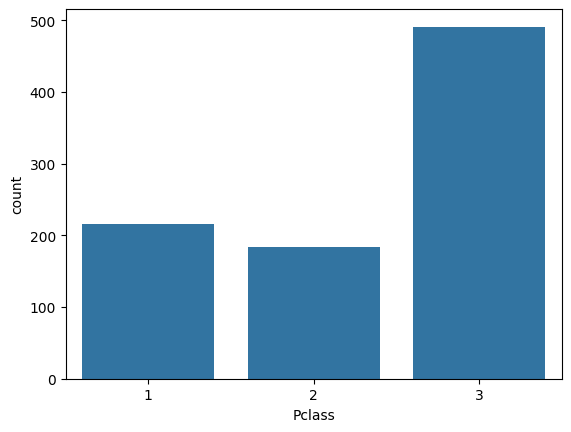

In [26]:
print(df['Pclass'].value_counts()/891*100)
sns.countplot(x='Pclass',data=df)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

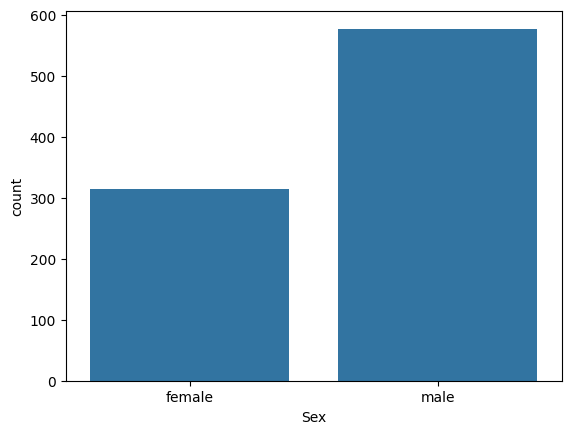

In [27]:
print(df['Sex'].value_counts()/891*100)
sns.countplot(x='Sex',data=df)

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

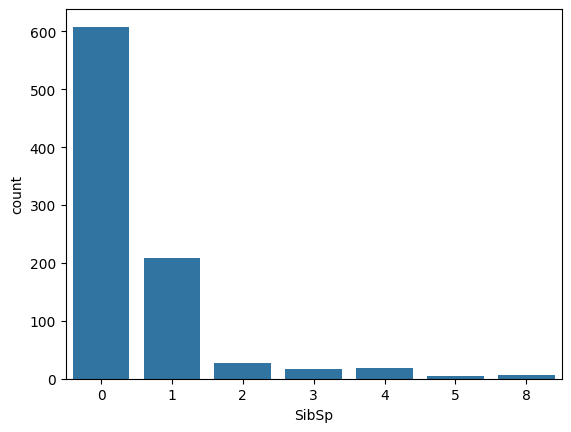

In [28]:
print(df['SibSp'].value_counts()/891*100)
sns.countplot(x='SibSp',data=df)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

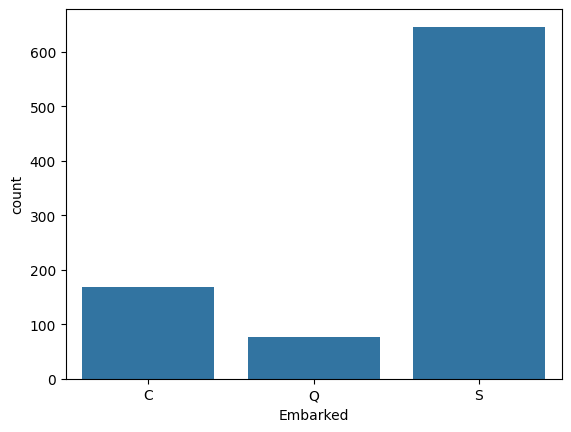

In [29]:
print(df['Embarked'].value_counts()/891*100)
sns.countplot(x='Embarked',data=df)

<Axes: ylabel='Age'>

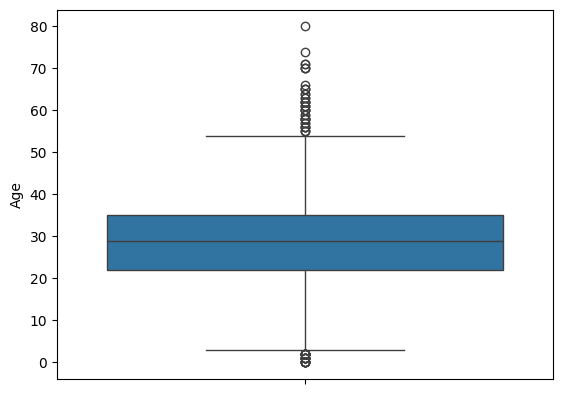

In [30]:
sns.boxplot(df['Age'])

In [31]:
print("Age between 60 to 70",df[(df['Age']>=60) & (df['Age']<=70)].shape[0])
print("Age between 70 to 80",df[(df['Age']>70) & (df['Age']>=80)].shape[0])
print("Age between 0 to 01",df[(df['Age']>=0) & (df['Age']<=1)].shape[0])

Age between 60 to 70 22
Age between 70 to 80 1
Age between 0 to 01 14


<Axes: ylabel='Fare'>

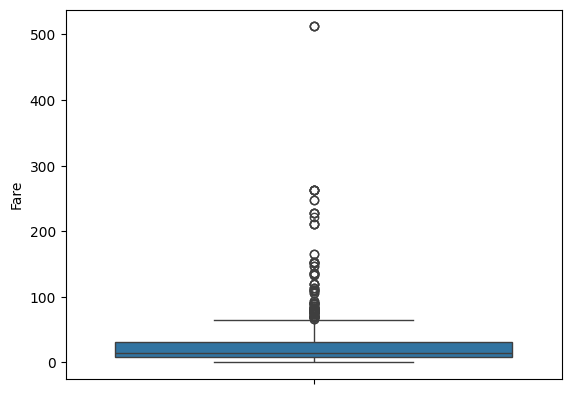

In [32]:
sns.boxplot(df['Fare'])

In [33]:
print("Age between 100 to 200",df[(df['Fare']>=100) & (df['Fare']<=200)].shape[0])
print("Age between 200 to 300",df[(df['Fare']>200) & (df['Fare']<=300)].shape[0])
print("Age between 300 to above",df[(df['Fare']>500)].shape[0])

Age between 100 to 200 33
Age between 200 to 300 17
Age between 300 to above 3


In [34]:
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [35]:

pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [37]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)


In [38]:
# Create dummy variables for 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# Create dummy variables for 'Sex'
sex_dummies = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
df = pd.concat([df, sex_dummies], axis=1)
df.drop('Sex', axis=1, inplace=True)


In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22,1,0,7.2500,0,1,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,1,0
3,1,1,35,1,0,53.1000,0,1,0
4,0,3,35,0,0,8.0500,0,1,1


#Apply logistic regression

In [40]:
df.drop(columns=['Survived'],axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22,1,0,7.2500,0,1,1
1,1,38,1,0,71.2833,0,0,0
2,3,26,0,0,7.9250,0,1,0
3,1,35,1,0,53.1000,0,1,0
4,3,35,0,0,8.0500,0,1,1


In [41]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = df.drop(columns=['Survived'])
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train_scaled, y_train)





LogisticRegression(max_iter=200, solver='liblinear')

In [43]:
predictions = model.predict(X_test_scaled)

In [44]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [45]:
accuracy_score(y_test,predictions)

0.8100558659217877

##TASK_2

#TWO ALGORITHMs


In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler

In [47]:

rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Fit models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best score for Random Forest:", rf_random_search.best_score_)


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}
Best score for Random Forest: 0.8272037821333595


Random Forest Metrics:
Accuracy: 0.8156424581005587
Precision: 0.8253968253968254
Recall: 0.7027027027027027
F1 Score: 0.7591240875912408
ROC AUC: 0.798970398970399
SVM Metrics:
Accuracy: 0.8156424581005587
Precision: 0.8253968253968254
Recall: 0.7027027027027027
F1 Score: 0.7591240875912408
ROC AUC: 0.798970398970399


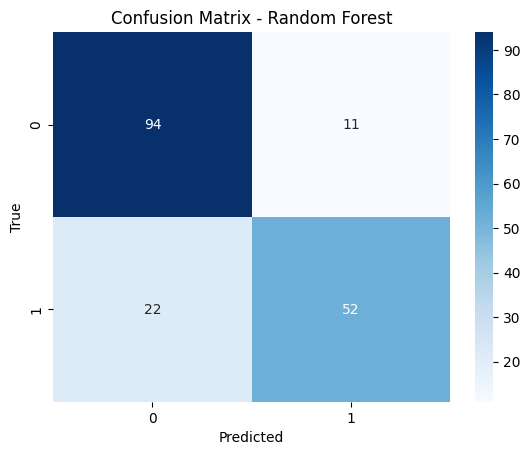

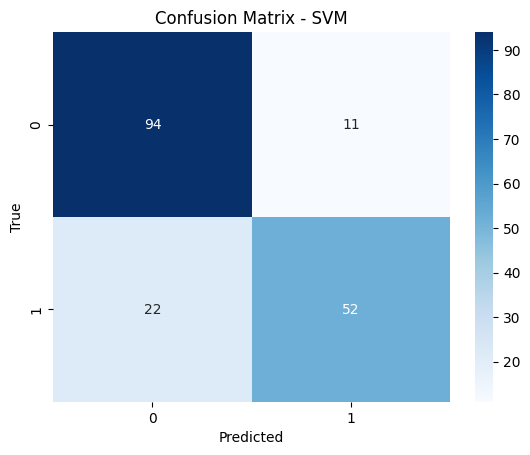

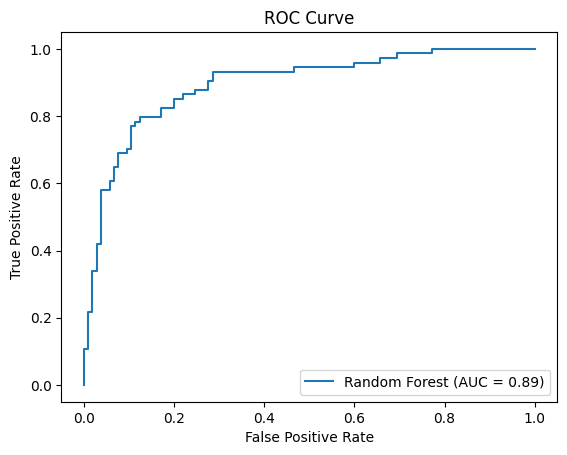

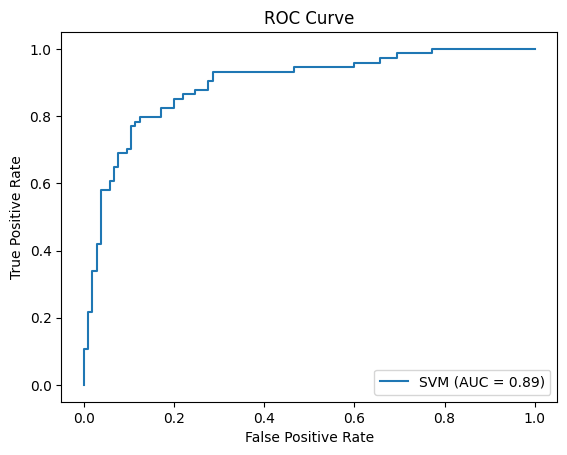

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


best_rf = rf_random_search.best_estimator_
best_svm = rf_random_search.best_estimator_

# Predictions
rf_predictions = best_rf.predict(X_test)
svm_predictions = best_svm.predict(X_test)


def print_metrics(y_true, predictions, model_name):
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy_score(y_true, predictions)}')
    print(f'Precision: {precision_score(y_true, predictions)}')
    print(f'Recall: {recall_score(y_true, predictions)}')
    print(f'F1 Score: {f1_score(y_true, predictions)}')
    print(f'ROC AUC: {roc_auc_score(y_true, predictions)}')

print_metrics(y_test, rf_predictions, 'Random Forest')
print_metrics(y_test, svm_predictions, 'SVM')


def plot_confusion_matrix(y_true, predictions, model_name):
    cm = confusion_matrix(y_true, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')
plot_confusion_matrix(y_test, svm_predictions, 'SVM')


def plot_roc_curve(y_true, predictions_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, predictions_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, predictions_proba):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

rf_predictions_proba = best_rf.predict_proba(X_test)[:, 1]
svm_predictions_proba = best_svm.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test, rf_predictions_proba, 'Random Forest')
plot_roc_curve(y_test, svm_predictions_proba, 'SVM')


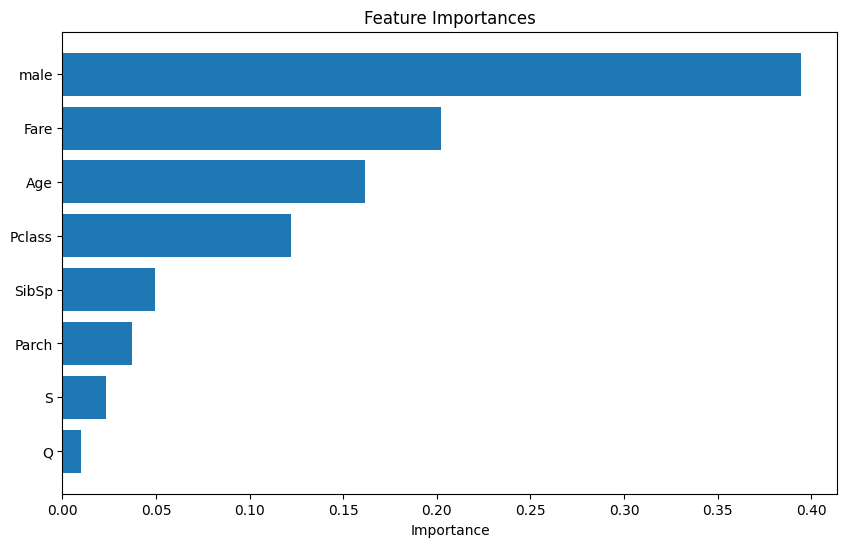

In [52]:
# Feature importance for Random Forest
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.barh(range(X.shape[1]), importances[indices], align='center')
    plt.yticks(range(X.shape[1]), X.columns[indices])
    plt.xlabel('Importance')
    plt.show()

plot_feature_importance(best_rf, X)
